In [17]:
!pip install gffutils

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 6.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from Bio.SeqIO import parse
import gffutils
from Bio import SeqIO
import matplotlib.pyplot as plt
import os
import gffutils
import pandas as pd
from Bio.Align import PairwiseAligner

In [2]:
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Strings must be of the same length")
    
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))

In [3]:
def grantham_distance(s1, s2):
    grantham_matrix = {
      'A': {'A':0,'R':112,'N':111,'D':126,'C':195,'Q':91,'E':107,'G':60,'H':86,'I':94,'L':96,'K':106,'M':84,'F':113,'P':27,'S':99,'T':58,'W':148,'Y':112,'V':64},
      'R': {'A':112,'R':0,'N':86,'D':96,'C':180,'Q':43,'E':54,'G':125,'H':29,'I':97,'L':102,'K':26,'M':91,'F':97,'P':103,'S':110,'T':71,'W':101,'Y':77,'V':96},
      'N': {'A':111,'R':86,'N':0,'D':23,'C':139,'Q':46,'E':42,'G':80,'H':68,'I':149,'L':153,'K':94,'M':142,'F':158,'P':91,'S':46,'T':65,'W':174,'Y':143,'V':133},
      'D': {'A':126,'R':96,'N':23,'D':0,'C':154,'Q':61,'E':45,'G':94,'H':81,'I':168,'L':172,'K':101,'M':160,'F':177,'P':108,'S':65,'T':85,'W':181,'Y':160,'V':152},
      'C': {'A':195,'R':180,'N':139,'D':154,'C':0,'Q':154,'E':170,'G':159,'H':174,'I':198,'L':198,'K':202,'M':196,'F':205,'P':169,'S':112,'T':149,'W':215,'Y':194,'V':192},
      'Q': {'A':91,'R':43,'N':46,'D':61,'C':154,'Q':0,'E':29,'G':87,'H':24,'I':109,'L':113,'K':53,'M':101,'F':116,'P':76,'S':68,'T':42,'W':130,'Y':99,'V':96},
      'E': {'A':107,'R':54,'N':42,'D':45,'C':170,'Q':29,'E':0,'G':98,'H':40,'I':134,'L':138,'K':56,'M':126,'F':140,'P':93,'S':80,'T':65,'W':152,'Y':122,'V':121},
      'G': {'A':60,'R':125,'N':80,'D':94,'C':159,'Q':87,'E':98,'G':0,'H':98,'I':135,'L':138,'K':127,'M':127,'F':153,'P':42,'S':56,'T':59,'W':184,'Y':147,'V':109},
      'H': {'A':86,'R':29,'N':68,'D':81,'C':174,'Q':24,'E':40,'G':98,'H':0,'I':94,'L':99,'K':32,'M':87,'F':100,'P':77,'S':89,'T':47,'W':115,'Y':83,'V':84},
      'I': {'A':94,'R':97,'N':149,'D':168,'C':198,'Q':109,'E':134,'G':135,'H':94,'I':0,'L':5,'K':102,'M':10,'F':21,'P':95,'S':142,'T':89,'W':61,'Y':33,'V':29},
      'L': {'A':96,'R':102,'N':153,'D':172,'C':198,'Q':113,'E':138,'G':138,'H':99,'I':5,'L':0,'K':107,'M':15,'F':22,'P':98,'S':145,'T':92,'W':61,'Y':36,'V':32},
      'K': {'A':106,'R':26,'N':94,'D':101,'C':202,'Q':53,'E':56,'G':127,'H':32,'I':102,'L':107,'K':0,'M':95,'F':102,'P':103,'S':121,'T':78,'W':110,'Y':85,'V':97},
      'M': {'A':84,'R':91,'N':142,'D':160,'C':196,'Q':101,'E':126,'G':127,'H':87,'I':10,'L':15,'K':95,'M':0,'F':28,'P':87,'S':135,'T':81,'W':67,'Y':36,'V':21},
      'F': {'A':113,'R':97,'N':158,'D':177,'C':205,'Q':116,'E':140,'G':153,'H':100,'I':21,'L':22,'K':102,'M':28,'F':0,'P':114,'S':155,'T':103,'W':40,'Y':22,'V':50},
      'P': {'A':27,'R':103,'N':91,'D':108,'C':169,'Q':76,'E':93,'G':42,'H':77,'I':95,'L':98,'K':103,'M':87,'F':114,'P':0,'S':74,'T':38,'W':147,'Y':110,'V':68},
      'S': {'A':99,'R':110,'N':46,'D':65,'C':112,'Q':68,'E':80,'G':56,'H':89,'I':142,'L':145,'K':121,'M':135,'F':155,'P':74,'S':0,'T':58,'W':177,'Y':144,'V':124},
      'T': {'A':58,'R':71,'N':65,'D':85,'C':149,'Q':42,'E':65,'G':59,'H':47,'I':89,'L':92,'K':78,'M':81,'F':103,'P':38,'S':58,'T':0,'W':128,'Y':92,'V':69},
      'W': {'A':148,'R':101,'N':174,'D':181,'C':215,'Q':130,'E':152,'G':184,'H':115,'I':61,'L':61,'K':110,'M':67,'F':40,'P':147,'S':177,'T':128,'W':0,'Y':37,'V':88},
      'Y': {'A':112,'R':77,'N':143,'D':160,'C':194,'Q':99,'E':122,'G':147,'H':83,'I':33,'L':36,'K':85,'M':36,'F':22,'P':110,'S':144,'T':92,'W':37,'Y':0,'V':55},
      'V': {'A':64,'R':96,'N':133,'D':152,'C':192,'Q':96,'E':121,'G':109,'H':84,'I':29,'L':32,'K':97,'M':21,'F':50,'P':68,'S':124,'T':69,'W':88,'Y':55,'V':0}
   }
    
    if len(s1) != len(s2):
        raise ValueError("Sequences must be of the same length")

    distance = 0
    compared_sites = 0

    for aa1, aa2 in zip(s1, s2):
        if aa1 == "-" or aa2 == "-":
            continue
        if aa1 == "*" or aa2 == "*":
            continue
        if aa1 not in grantham_matrix or aa2 not in grantham_matrix[aa1]:
            continue
        distance += grantham_matrix[aa1][aa2]
        compared_sites += 1
    return distance, compared_sites

In [4]:
def load_or_create_db(gff_path, db_name):
    
    if not os.path.exists(db_name):
        print(f"Creating {db_name}...")
        gffutils.create_db(
            gff_path,
            dbfn=db_name,
            force=True,
            keep_order=True,
            merge_strategy="merge",
            sort_attribute_values=True
        )
    else:
        print(f"{db_name} already exists. Loading...")

    return gffutils.FeatureDB(db_name)


db_denv1 = load_or_create_db("../resources/test/meta_ref_DENV1.gff3", "denv1.db")
db_denv2 = load_or_create_db("../resources/test/meta_ref_DENV2.gff3", "denv2.db")
db_denv3 = load_or_create_db("../resources/test/meta_ref_DENV3.gff3", "denv3.db")
db_denv4 = load_or_create_db("../resources/test/meta_ref_DENV4.gff3", "denv4.db")


denv1.db already exists. Loading...
denv2.db already exists. Loading...
denv3.db already exists. Loading...
denv4.db already exists. Loading...


In [5]:
features_list = list(db_denv1.features_of_type("mature_protein_region_of_CDS"))

for f in features_list:
    print(f"ID: {f.id}")
    print(f"Parent: {f.attributes.get('Parent')}")
    print(f"Gene: {f.attributes.get('gene')}")
    print(f"Product: {f.attributes.get('product')}")
    print(f"Protein ID: {f.attributes.get('protein_id')}")
    print(f"Location: {f.start}-{f.end} ({f.strand})")
    print("---")

ID: id-NP_059433.1:1..114
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['anchored capsid protein ancC']
Protein ID: ['NP_722457.2']
Location: 95-436 (+)
---
ID: id-NP_059433.1:1..100
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['capsid protein C']
Protein ID: ['NP_722466.2']
Location: 95-394 (+)
---
ID: id-NP_059433.1:115..280
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['membrane glycoprotein precursor prM']
Protein ID: ['NP_733807.2']
Location: 437-934 (+)
---
ID: id-NP_059433.1:115..205
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['protein pr']
Protein ID: ['YP_009164956.1']
Location: 437-709 (+)
---
ID: id-NP_059433.1:206..280
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['membrane glycoprotein M']
Protein ID: ['NP_722459.2']
Location: 710-934 (+)
---
ID: id-NP_059433.1:281..775
Parent: ['cds-NP_059433.1']
Gene: None
Product: ['envelope protein E']
Protein ID: ['NP_722460.2']
Location: 935-2419 (+)
---
ID: id-NP_059433.1:776..1127
Parent: ['cds-NP_059433.1']
Gene:

In [33]:
def get_feature(db, genome, feature):
    if feature == "CDS":
        cds = list(db.features_of_type(feature))[0]
    else:
        for f in db.features_of_type("mature_protein_region_of_CDS"):
            product_name = f.attributes.get("product", [""])[0]
            if feature in product_name:
                cds = f
                break
        
    cds_seq = genome.seq[cds.start - 1 : cds.end]
    
    if cds.strand == "-":
        cds_seq = cds_seq.reverse_complement()
    seq_feature = cds_seq.translate()
    
    #print("CDS coordinates:", cds.start, cds.end)
    #print("CDS length (nt):", len(cds_seq))
    #print("Polyprotein length (aa):", len(seq_feature))

    return seq_feature

#"envelope protein E"
genome1 = next(SeqIO.parse("../resources/test/ref_DENV1.fasta", "fasta"))
seq_ref_denv1 = get_feature(db_denv1, genome1, "CDS")
genome2 = next(SeqIO.parse("../resources/test/ref_DENV2.fasta", "fasta"))
seq_ref_denv2 = get_feature(db_denv2, genome2, "CDS")
genome3 = next(SeqIO.parse("../resources/test/ref_DENV3.fasta", "fasta"))
seq_ref_denv3 = get_feature(db_denv3, genome3, "CDS")
genome4 = next(SeqIO.parse("../resources/test/ref_DENV4.fasta", "fasta"))
seq_ref_denv4 = get_feature(db_denv4, genome4, "CDS")

In [34]:
from Bio.Seq import Seq

def get_longest_orf(seq):
    longest = ""
    
    for frame in range(3):
        translated = seq[frame:].translate(to_stop=False)
        proteins = translated.split("*")
        
        for p in proteins:
            if len(p) > len(longest):
                longest = p
                
    return longest

for record in SeqIO.parse("../resources/test/col_Complete.fasta", "fasta"):
    longest_orf = get_longest_orf(record.seq)
    
    #print("Longest ORF length (aa):", longest_orf)


F:\Users\EQUIPO\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [45]:
aligner = PairwiseAligner()
aligner.mode = "global"

def extract_serotype(header):
    first_part = header.split("/")[0]
    return first_part.replace("h", "")

rows = []

for record in SeqIO.parse("../resources/test/col_Complete.fasta", "fasta"):
    prot_seq = get_longest_orf(record.seq)

    sero = extract_serotype(record.id)

    '''
    if (sero == 'DenV1'):
        prot_seq = get_feature(db_denv1, record, "envelope protein E")
    elif (sero == 'DenV2'):
        prot_seq = get_feature(db_denv2, record, "envelope protein E")
    elif (sero == 'DenV3'):
        prot_seq = get_feature(db_denv3, record, "envelope protein E")
    elif (sero == 'DenV4'):
        prot_seq = get_feature(db_denv4, record, "envelope protein E")
    else:
        print("No reconoicio nada")
    '''
    
    align1 = aligner.align(seq_ref_denv1, prot_seq)[0]
    align2 = aligner.align(seq_ref_denv2, prot_seq)[0]
    align3 = aligner.align(seq_ref_denv3, prot_seq)[0]
    align4 = aligner.align(seq_ref_denv4, prot_seq)[0]

    ref1, qry1 = str(align1[0]), str(align1[1])
    ref2, qry2 = str(align2[0]), str(align2[1])
    ref3, qry3 = str(align3[0]), str(align3[1])
    ref4, qry4 = str(align4[0]), str(align4[1])
    
    total1, sites1 = grantham_distance(ref1, qry1)
    total2, sites2 = grantham_distance(ref2, qry2)
    total3, sites3 = grantham_distance(ref3, qry3)
    total4, sites4 = grantham_distance(ref4, qry4)
    
    rows.append({
        "id": record.id,
        "serotype": extract_serotype(record.id),
        "grantham_DENV1": total1,
        "grantham_DENV2": total2,
        "grantham_DENV3": total3,
        "grantham_DENV4": total4
    })

df = pd.DataFrame(rows)

df.head()


F:\Users\EQUIPO\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,id,serotype,grantham_DENV1,grantham_DENV2,grantham_DENV3,grantham_DENV4
0,hDenV3/Colombia/SAN-BROAD-3012/2001|EPI_ISL_17...,DenV3,39783,55185,2144,59680
1,hDenV2/Colombia/SAN-BROAD-0000030/2004|EPI_ISL...,DenV2,55862,3757,54565,62717
2,hDenV1/Colombia/SAN-BROAD-0000031/1998|EPI_ISL...,DenV1,3674,56120,40050,63444
3,hDenV1/Colombia/SAN-BROAD-0000032/2008|EPI_ISL...,DenV1,4086,55825,39841,63390
4,hDenV1/Colombia/NSA-BROAD-0000023/2006|EPI_ISL...,DenV1,3764,55963,39968,63358


Explained variance: [0.54523935 0.28100512]


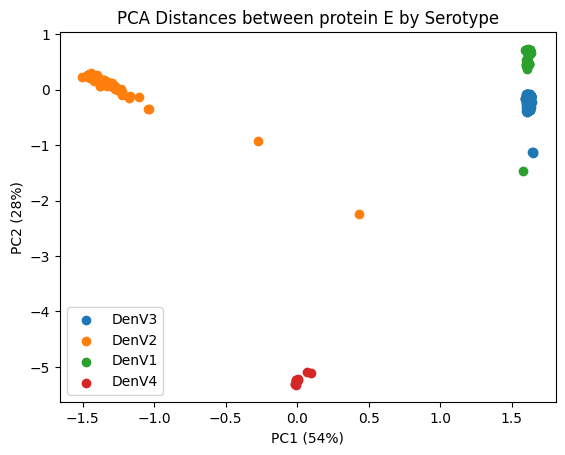

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df[[
    "grantham_DENV1",
    "grantham_DENV2",
    "grantham_DENV3",
    "grantham_DENV4"
]]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

df["PC1"] = coords[:, 0]
df["PC2"] = coords[:, 1]

print("Explained variance:", pca.explained_variance_ratio_)

for ser in df["serotype"].unique():
    subset = df[df["serotype"] == ser]
    plt.scatter(subset["PC1"], subset["PC2"], label=ser)

plt.xlabel("PC1 ("+str(int(pca.explained_variance_ratio_[0]*100))+'%)')
plt.ylabel("PC2 ("+str(int(pca.explained_variance_ratio_[1]*100))+'%)')
plt.title("PCA Distances between protein E by Serotype")
plt.legend()
plt.show()

In [47]:
# Select only distance columns
distance_cols = [
    "grantham_DENV1",
    "grantham_DENV2",
    "grantham_DENV3",
    "grantham_DENV4"
]

corr_matrix = df[distance_cols].corr(method="pearson")

corr_matrix


,grantham_DENV1,grantham_DENV2,grantham_DENV3,grantham_DENV4
grantham_DENV1,1.000000,-0.712186,0.337813,-0.190115
grantham_DENV2,-0.712186,1.000000,-0.695239,-0.276333
grantham_DENV3,0.337813,-0.695239,1.000000,-0.039249
grantham_DENV4,-0.190115,-0.276333,-0.039249,1.000000


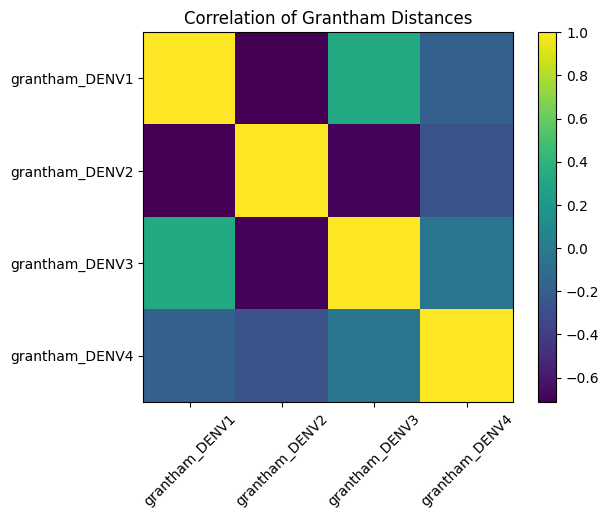

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(corr_matrix)
plt.xticks(range(len(distance_cols)), distance_cols, rotation=45)
plt.yticks(range(len(distance_cols)), distance_cols)
plt.colorbar()
plt.title("Correlation of Grantham Distances")
plt.show()